In [6]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta as td
import pandas as pd
%matplotlib inline
import sys

#Make sure Python Analysis folder in in PYTHONPATH and import the MHDpy module
PythonAnalysisPath = 'C:\\Users\\aspit\\Git\\MHDLab\\Python Analysis'
if not PythonAnalysisPath in sys.path:
    sys.path.append(PythonAnalysisPath)
import MHDpy.Importing
import MHDpy.plotting
from nptdms import TdmsFile as TF

import importlib

mpl.rcParams.update({'font.size': 18})

In [9]:
###Paths###
pathnames = MHDpy.Importing.get_pathnames("C:\\Users\\aspit\\OneDrive\\Data\\2018-10-06_cut\\Diadem analysis_smooth", regExp= ".*\.tdms$")
laserprofile_pathnames= MHDpy.Importing.get_pathnames("C:\\Users\\aspit\\OneDrive\\Data\\2017-10-23")

###Files###
file1 = TF(pathnames['Together_tdms.tdms'])
file2 = TF(pathnames['RawData_770.tdms'])
file_laser = TF(laserprofile_pathnames[0])


###Groups###
Potassium = file1.object('Norm').as_dataframe()
Laser =  file1.object('500Hz').as_dataframe() 
RawData_Frames = file2.object('Frames').as_dataframe()  
RawData_extra =  file2.object('Results_770_seed_expt4_500Hz 2017 October 06 14_06_54').as_dataframe() 

###Channels###

#note that in this case the maximum of the peak was already accomplished in labview, hence no MHDpy.analysis stuff
K_int_1 = Potassium['Peak1_max_seed_expt4_767_Potassium1'].as_matrix()
K_int_2 = Potassium['Peak2_max_seed_expt4_770_Potassium1'].as_matrix()
K_time = Potassium['GateTime'].as_matrix()
L_int = Laser['Normalized'].as_matrix()
L_time = Laser['Time_offset'].as_matrix()
spectra = RawData_Frames['I_Frame_1'].as_matrix()
spectra_wl = RawData_extra['Wavelength'].as_matrix()
spectra_time = RawData_extra['GateTime'].as_matrix()

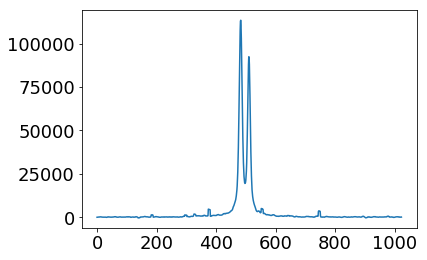

In [18]:
plt.plot(spectra)

In [10]:
offset_time = 815

K_time_off = K_time - offset_time
L_time_off = L_time - offset_time

K_int_1_norm = K_int_1/K_int_1.max()
K_int_2_norm = K_int_2/K_int_2.max()
L_int_norm = L_int/L_int.max()

spectra_time_off = spectra_time - offset_time 

(-20, 60)

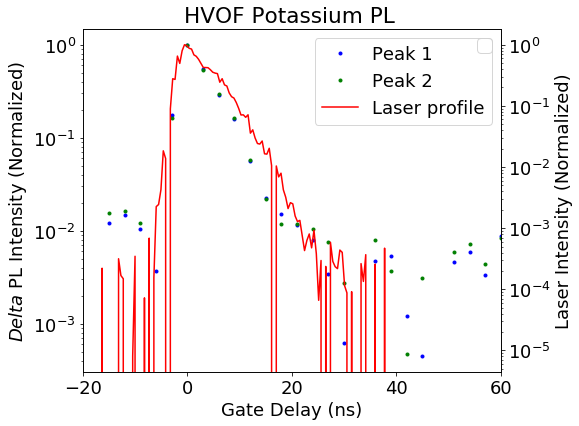

In [11]:
importlib.reload(MHDpy.plotting)

PLplot = MHDpy.plotting.PLplot(L_int_norm, L_time_off, K_int_1_norm, K_int_2_norm, K_time_off)

PLplot.fig.suptitle('HVOF Potassium PL', y = 1)

PLplot.ax1.set_xlim(-20,60)

#MHDpy.plotting.PL(L_int_norm, L_time_off, K_int_1_norm, K_int_2_norm, K_time_off)

KeyError: 'ffmpeg'

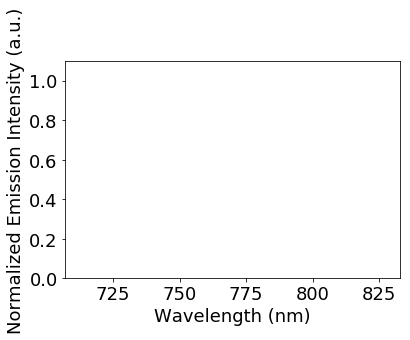

In [12]:
MHDpy.plotting.spectral_anim(RawData_Frames, spectra_wl,spectra_time_off )